In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data

data = pd.read_csv("Advertising.csv")

In [3]:
#quick look at the data

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
#check data shape

data.shape

(1000, 10)

In [5]:
#check null data
#no null data

data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
#check duplicate data
#no duplicate data

data.duplicated().any()

False

In [7]:
#check data type
#Male and Clicked on Ad is wrongly assigned

data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [8]:
#assign the true data type

data = data.astype({"Male": "object", "Clicked on Ad": "object", "Timestamp": "datetime64"})

In [9]:
#recheck the data types

data.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                object
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                       object
dtype: object

In [10]:
#check data statistic for numerical column

data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


In [11]:
#check data statistic for categorical column

data.describe(include = "object")

,Ad Topic Line,City,Male,Country,Clicked on Ad
count,1000,1000,1000,1000,1000
unique,1000,969,2,237,2
top,Cloned 5thgeneration orchestration,Lisamouth,0,France,0
freq,1,3,519,9,500


In [12]:
#EDA

array([[<AxesSubplot:title={'center':'Daily Time Spent on Site'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Area Income'}>,
        <AxesSubplot:title={'center':'Daily Internet Usage'}>],
       [<AxesSubplot:title={'center':'Timestamp'}>, <AxesSubplot:>]],
      dtype=object)

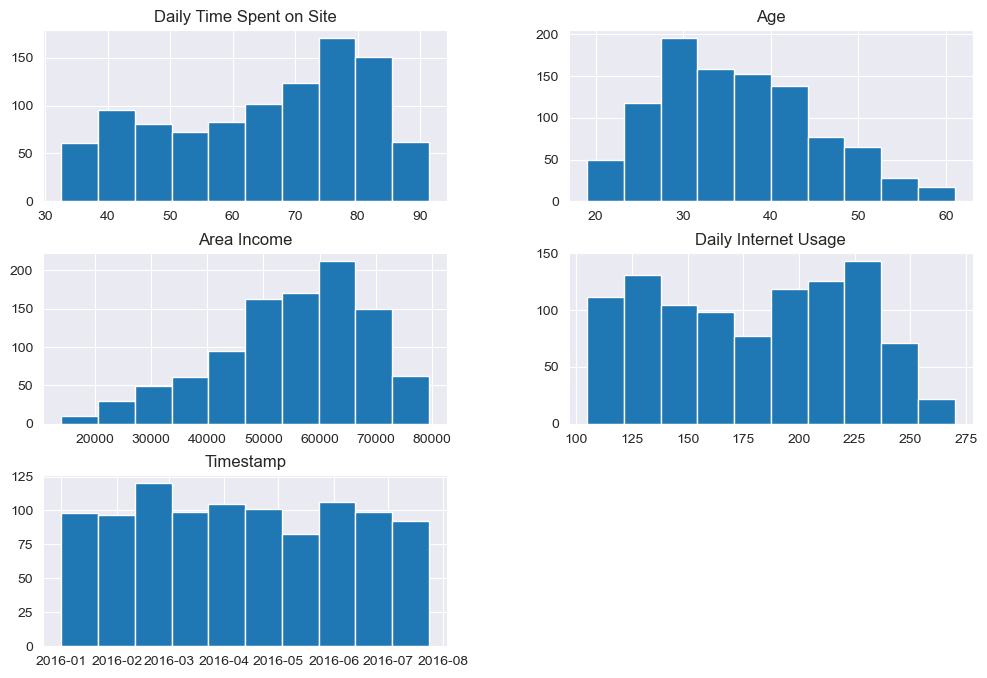

In [13]:
#Make histogram for each numerical data

sns.set_style("darkgrid")
data.hist(figsize = (12,8))

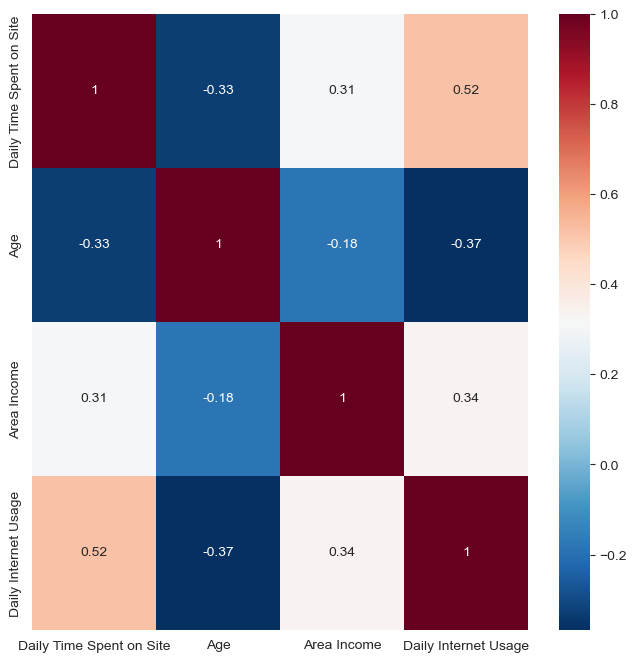

In [14]:
#make correlation heatmap

corrs = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrs, cmap='RdBu_r', annot = True)
plt.show()

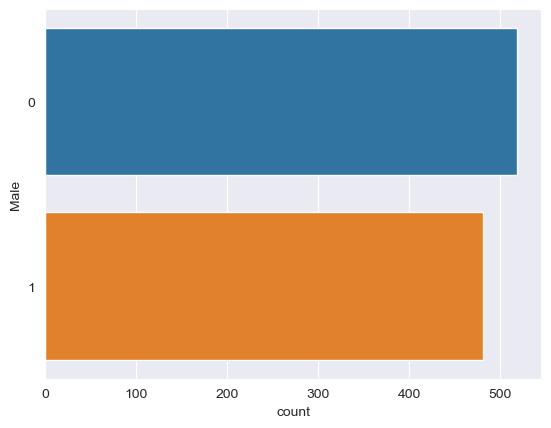

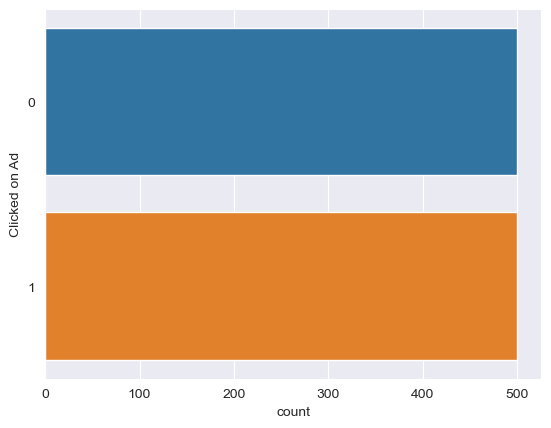

In [15]:
for column in data.select_dtypes(include = "object"):
    if data[column].nunique() < 10:
        sns.countplot(y = column, data = data)
        plt.show()

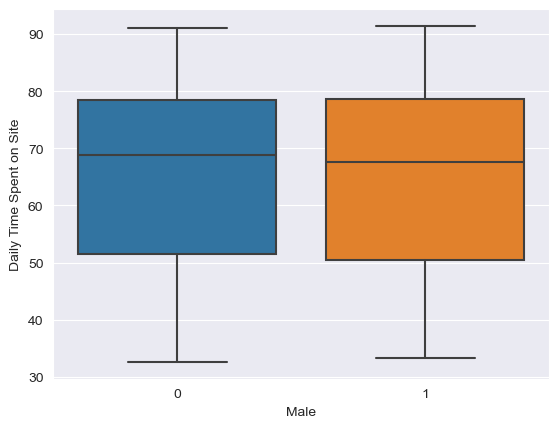

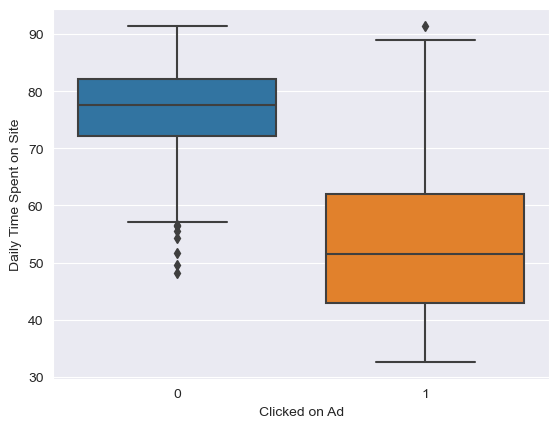

In [16]:
for column in data.select_dtypes(include = "object"):
    if data[column].nunique() < 10:
        sns.boxplot(x = column, y = "Daily Time Spent on Site", data = data)
        plt.show()

In [17]:
data.Country.value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   object        
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.2+ KB


In [19]:
#Hypothesis Testing

from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [22]:
def HypothesisTtest(divider, target, equal_var, alternative):

    #Split the data
    data1 = data[data[divider]==data[divider].unique()[0]][target]
    data2 = data[data[divider]==data[divider].unique()[1]][target]

    #Do he Hypothesis test
    result = stats.ttest_ind(a = data1, 
                         b = data2, 
                         equal_var=equal_var, 
                         alternative = alternative)
    
    #Count degree of freedom and t-critical
    df_data = len(data1)+len(data2)-2
    t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)

    #Plot sample distribution 
    x = np.arange(-4, 4, 0.001)
    plt.plot(x, stats.t.pdf(x, df = df_data), 
            color='blue')

    #Plot t-crit and t-stats
    plt.axvline(np.round(result.statistic, 4), color ="green", linestyle = "--", label ="t-stat")

    if alternative == "two-sided":
        plt.axvline(t_crit, color ="red", linestyle = "--", label ="t-crit")
        plt.axvline(-abs(t_crit), color ="red", linestyle = "--", label ="t-crit" )

    elif alternative == 'greater':
        plt.axvline(t_crit, color ="red", linestyle = "--", label ="t-crit")
    else: plt.axvline(-abs(t_crit), color ="red", linestyle = "--", label ="t-crit" )

    plt.legend()
    plt.xlabel("t")
    plt.ylabel("density")

    plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)},\
    t_crit = {np.round(t_crit,4)}, alpha = 0.05, p-value = {np.round(result.pvalue,3)}')

In [31]:
#check the mean of daily time spent on site for each gender
#our null hypothesis would be that the average is the same for both gender

pd.pivot_table(data, columns = "Male", values = "Daily Time Spent on Site", aggfunc = np.average)

Male,0,1
Daily Time Spent on Site,65.289287,64.688274


In [30]:
#check whether the variance is equal or unequal
#variance is equal

var1 = np.var(data[data["Male"]==0]["Daily Time Spent on Site"])
var2 = np.var(data[data["Male"]==1]["Daily Time Spent on Site"])

print(var1, var2)

243.60908638964077 258.9656304943357


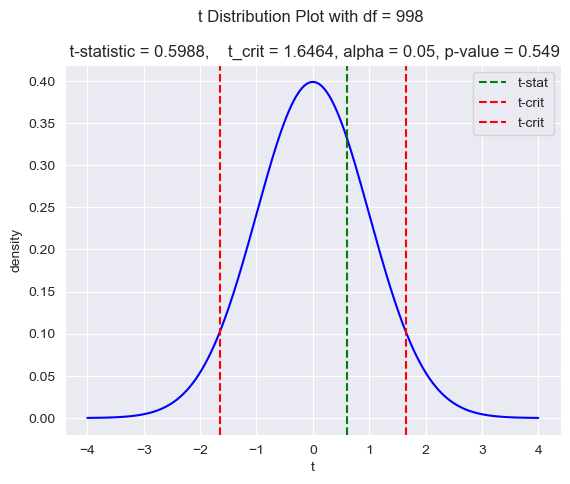

In [29]:
#H0: Average time spent on site for male = Average time spent on site for female
#H1: Average time spent on site for male != Average time spent on site for female
#significance level = 0.05

HypothesisTtest("Male", "Daily Time Spent on Site", True, "two-sided")

#Fail to reject H0

In [32]:
#check if clicking the ads affects how much time user spend on site
#check the mean of daily time spent on site for click and no click
#our null hypothesis would be that the average time spent is bigger if the user dont click on ad

pd.pivot_table(data, columns = "Clicked on Ad", values = "Daily Time Spent on Site", aggfunc = np.average)

Clicked on Ad,0,1
Daily Time Spent on Site,76.85462,53.14578


In [33]:
#check whether the variance is equal or unequal
#variance is unequal

var1 = np.var(data[data["Clicked on Ad"]==0]["Daily Time Spent on Site"])
var2 = np.var(data[data["Clicked on Ad"]==1]["Daily Time Spent on Site"])

print(var1, var2)

57.03976765560001 164.07720079160003


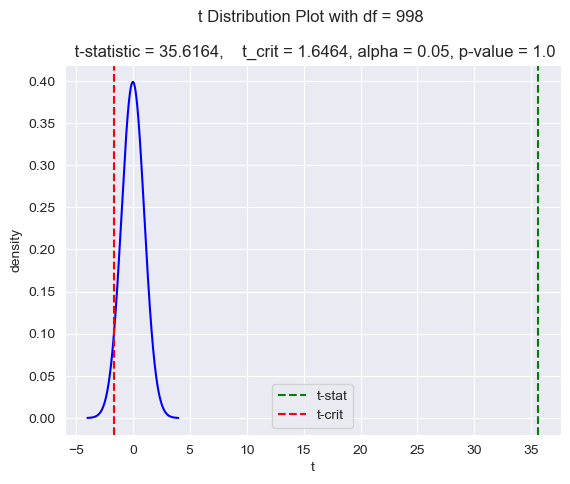

In [44]:
#H0: Average time spent on site for not clicking on ad > Average time spent on site for click on ad
#H1: Average time spent on site for not clicking on ad < Average time spent on site for click on ad
#significance level = 0.05

HypothesisTtest("Clicked on Ad", "Daily Time Spent on Site", False, "less")

#Fail to reject H0

In [45]:
#Linear Regression

import statsmodels.formula.api as smf

In [47]:
def GetCoefError(result):
    coef = result.params
    stderror = result.bse
    r2 = result.rsquared
    rss = np.sum(result.resid**2)

    coefstde = pd.DataFrame(data = np.transpose([coef, stderror]),
                        columns = ["coef", "std_error"],
                        index = coef.index)
    param = pd.DataFrame(data = [r2,rss], index = ["rsquared", "RSS"], columns = ["Value"])

    return coefstde, param

In [54]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [85]:
x = data["Age"]
y = data["Daily Time Spent on Site"]

result = smf.ols("y~x", data).fit()
coefstde, params = GetCoefError(result)

In [86]:
coefstde

,coef,std_error
Intercept,86.541445,1.997412
x,-0.598218,0.053891


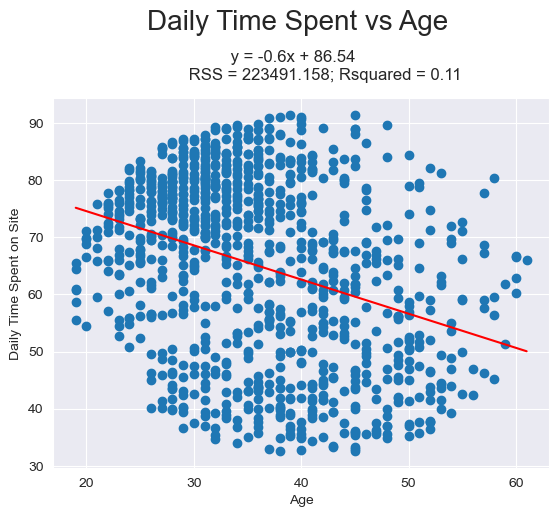

In [100]:
#taking the intercept and beta from the cofstde table
intercept = coefstde.iloc[0,0]
b1_hat = coefstde.iloc[1,0]

#define x and y for the line to be plotted
xplot = np.linspace(np.min(x), np.max(x), len(data))
yplot = intercept+b1_hat*xplot

#make scatter plot of the data
plt.scatter(x, y)
plt.plot(xplot, yplot, color = "red")

#make figure and axes title
plt.title(f"Daily Time Spent vs Age \n\n", fontdict= {"fontsize": 20})
plt.suptitle(f" y = {np.round(b1_hat,2)}x + {np.round(intercept,2)} \n \
             RSS = {np.round(params.iloc[1,0],3)}; Rsquared = {np.round(params.iloc[0,0],3)}")
plt.xlabel("Age")
plt.ylabel("Daily Time Spent on Site")

plt.show()

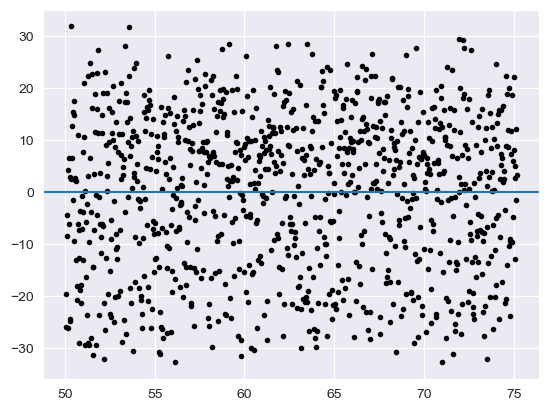

In [69]:
# plot the predicted values, and the residual
plt.scatter(yplot, result.resid, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="OLS fitted line")

In [101]:
x = data["Daily Internet Usage"]
y = data["Daily Time Spent on Site"]

result = smf.ols("y~x", data).fit()
coefstde, params = GetCoefError(result)

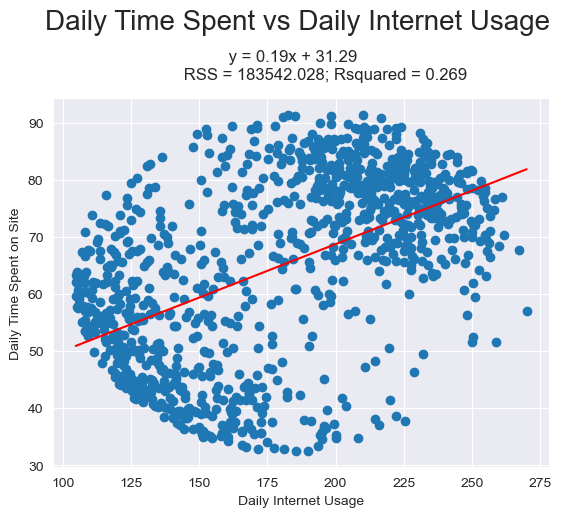

In [104]:
#taking the intercept and beta from the cofstde table
intercept = coefstde.iloc[0,0]
b1_hat = coefstde.iloc[1,0]

#define x and y for the line to be plotted
xplot = np.linspace(np.min(x), np.max(x), len(data))
yplot = intercept+b1_hat*xplot

#make scatter plot of the data
plt.scatter(x, y)
plt.plot(xplot, yplot, color = "red")

#make figure and axes title
plt.title(f"Daily Time Spent vs Daily Internet Usage \n\n", fontdict= {"fontsize": 20})
plt.suptitle(f" y = {np.round(b1_hat,2)}x + {np.round(intercept,2)} \n \
             RSS = {np.round(params.iloc[1,0],3)}; Rsquared = {np.round(params.iloc[0,0],3)}")
plt.xlabel("Daily Internet Usage")
plt.ylabel("Daily Time Spent on Site")

plt.show()

In [105]:
x1 = data["Daily Internet Usage"]
x2 = data["Age"]
y = data["Daily Time Spent on Site"]

result = smf.ols("y~x1+x2", data).fit()
coefstde, params = GetCoefError(result)

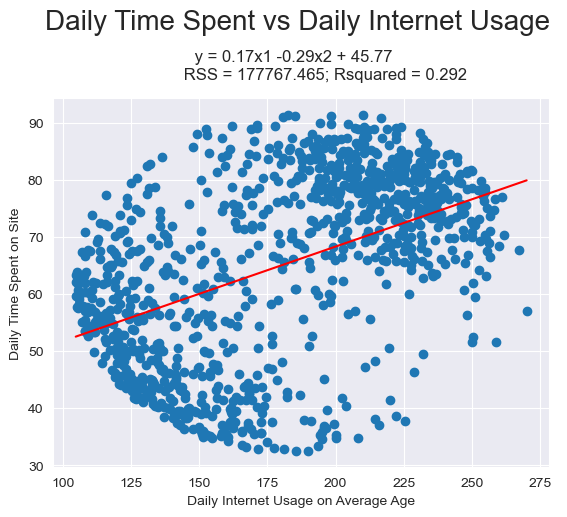

In [108]:
#taking the intercept and beta from the cofstde table
intercept = coefstde.iloc[0,0]
b1_hat = coefstde.iloc[1,0]
b2_hat = coefstde.iloc[2,0]

#define x and y for the line to be plotted
xplot = np.linspace(np.min(x), np.max(x), len(data))
yplot = intercept+b1_hat*xplot+b2_hat*np.mean(data["Age"])

#make scatter plot of the data
plt.scatter(x, y)
plt.plot(xplot, yplot, color = "red")

#make figure and axes title
plt.title(f"Daily Time Spent vs Daily Internet Usage \n\n", fontdict= {"fontsize": 20})
plt.suptitle(f" y = {np.round(b1_hat,2)}x1 {np.round(b2_hat,2)}x2 + {np.round(intercept,2)} \n \
             RSS = {np.round(params.iloc[1,0],3)}; Rsquared = {np.round(params.iloc[0,0],3)}")
plt.xlabel("Daily Internet Usage on Average Age")
plt.ylabel("Daily Time Spent on Site")

plt.show()

In [118]:
data = data.astype({"Clicked on Ad": "int"})

In [119]:
x1 = data["Daily Internet Usage"]
x2 = data["Clicked on Ad"]
y = data["Daily Time Spent on Site"]

result = smf.ols("y~x1+x2+x1:x2", data).fit()
coefstde, params = GetCoefError(result)

In [120]:
coefstde

,coef,std_error
Intercept,88.675486,4.200561
x1,-0.055105,0.019462
x2,-24.911045,4.788399
x1:x2,-0.017882,0.024864


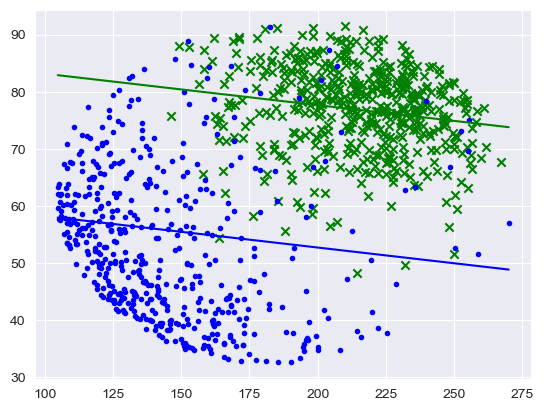

In [121]:
intercept = coefstde.iloc[0,0]
b1_hat = coefstde.iloc[1,0]
b2_hat = coefstde.iloc[2,0]
b3_hat = coefstde.iloc[3,0]
linestyles = {0 : "-", 1: "-"}
c = {0 : "g", 1: "b"}
markers = {0 : "x", 1: "."}

for i in range(2):
    plt.scatter(y = data[data["Clicked on Ad"]==i]["Daily Time Spent on Site"], x = data[data["Clicked on Ad"]==i]["Daily Internet Usage"],\
                color = c[i],
                marker = markers[i])

xplot = np.linspace(np.min(x1), np.max(x1), len(data))
yplot = [intercept+ b1_hat*xplot +b2_hat * i + b3_hat * i for i in range(2)]

for i in range(2):
    plt.plot(xplot, yplot[i], c= c[i], linestyle = linestyles[i])